In [47]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
path = 'http://www3.dsi.uminho.pt/pcortez/forestfires/forestfires.csv'
raw_csv = urllib2.urlopen(path)
raw_csv = urllib2.urlopen(path)
feature_names = ('X', 'Y', 'month', 'day', "FFMC", "DMC", 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
target_name = 'area'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv)

**Path 수정 : http://www3.dsi.uminho.pt/pcortez/forestfires/forestfires.csv**

In [48]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


##**[Mission 1] 불이 가장 많이 발생한 지역 좌표 (X,Y) 상위 5개를 제시하시오.**
 - 불이 난 '면적의 합'에 따라 제시

####**_1. 데이터 프레임 만들기_**

In [49]:
sdf = df[['X', 'Y', 'area']]

####**_2. X,Y 좌표에 따른 area 합 구하기_**

In [50]:
rdf = sdf.groupby(['X','Y']).sum()
rdf

area
X Y         
1 2   219.94
  3   157.14
  4   150.28
  5   115.47
2 2   462.65
  3     0.00
  4   143.37
  5    92.63
3 3     6.58
  4   126.35
  5     2.18
  6     0.00
4 3   172.88
  4   397.43
  5   287.01
  6    87.73
5 4    73.75
  5     0.00
  6    17.62
6 3   192.78
  4   144.47
  5  1384.05
  6     8.59
7 3    27.35
  4   474.37
  5    77.39
  6    86.45
8 3    26.31
  4    12.18
  5     2.93
  6  1265.30
  8   185.76
9 4   185.61
  5     8.16
  6    42.87
  9     4.47

####**_3. area의 크기에 따라 재 정렬_**
 - sort 이용하여 재정렬했지만, 작은 순서대로 정렬되어 출력을 마지막 5개만 함

In [51]:
rdf = rdf.sort_index(by='area')

In [52]:
rdf.tail(5)

,,area
X,Y,
4,4,397.43
2,2,462.65
7,4,474.37
8,6,1265.30
6,5,1384.05


* **result**
 - 가장 불이 많이 난 상위 5개의 지역 좌표
   1. [6,5] : 1384.05
   2. [8,6] : 1265.30
   3. [7,4] : 474.37
   4. [2,2] : 462.65
   5. [4,4] : 397.43

##**[Mission 2] 불이 가장 많이 발생한 월(month) 상위 2개 및 가장 많이 발생한 날(day) 상위 2개를 제시하시오.**

In [53]:
mdf = df[['month', 'area']]

In [54]:
mdf = mdf.groupby('month').sum()
mdf

,area
month,
apr,80.02
aug,2297.99
dec,119.97
feb,125.50
jan,0.00
jul,459.83
jun,99.30
mar,235.26
may,38.48


In [55]:
mdf = mdf.sort_index(by='area')

In [56]:
mdf.tail(2)

,area
month,
aug,2297.99
sep,3086.13


In [57]:
ddf = df[['day', 'area']]

In [58]:
ddf = ddf.groupby('day').sum()
ddf

,area
day,
fri,447.24
mon,706.53
sat,2144.86
sun,959.93
thu,997.10
tue,807.79
wed,578.60


In [59]:
ddf = ddf.sort_index(by='area')
ddf.tail(2)

,area
day,
thu,997.10
sat,2144.86


##**[Mission 3] 4대 주 요인(temp,RH,wind,rain) 속성별 기본 통계치 및 Box Plot 산출**

In [60]:
fdf = df[['temp', 'RH', 'wind', 'rain']]
fdf

,temp,RH,wind,rain
0,8.2,51,6.7,0.0
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.2
4,11.4,99,1.8,0.0
5,22.2,29,5.4,0.0
6,24.1,27,3.1,0.0
7,8.0,86,2.2,0.0
8,13.1,63,5.4,0.0
9,22.8,40,4.0,0.0


In [61]:
fdf.describe()

,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663
std,5.806625,16.317469,1.791653,0.295959
min,2.200000,15.000000,0.400000,0.000000
25%,15.500000,33.000000,2.700000,0.000000
50%,19.300000,42.000000,4.000000,0.000000
75%,22.800000,53.000000,4.900000,0.000000
max,33.300000,100.000000,9.400000,6.400000


In [62]:
num_row = fdf.shape[0]
save_temp = {}
save_RH = {}
save_wind = {}
save_rain = {}

In [88]:
min_temp = min(fdf['temp'])
max_temp = max(fdf['temp'])
array_temp = fdf['temp']
for i in range(num_row):
    save_temp[i] = (float)(array_temp[i]-min_temp)/(float)(max_temp-min_temp)

In [89]:
min_RH = min(fdf['RH'])
max_RH = max(fdf['RH'])
array_RH = fdf['RH']
for i in range(num_row):
    save_RH[i] = (float)(array_RH[i]-min_RH)/(float)(max_RH-min_RH)

In [90]:
min_wind = min(fdf['wind'])
max_wind = max(fdf['wind'])
array_wind = fdf['wind']
for i in range(num_row):
    save_wind[i] = (float)(array_wind[i]-min_wind)/(float)(max_wind-min_wind)

In [91]:
min_rain = min(fdf['rain'])
max_rain = max(fdf['rain'])
array_rain = fdf['rain']
for i in range(num_row):
    save_rain[i] = (float)(array_rain[i]-min_rain)/(float)(max_rain-min_rain)

In [92]:
ndf = pd.DataFrame({'temp' : save_temp,'RH' : save_RH,'wind' : save_wind,'rain' : save_rain})
nndf = ndf[['temp', 'RH', 'wind', 'rain']]
nndf.describe()

,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000
mean,0.536629,0.344567,0.401956,0.003385
std,0.186708,0.191970,0.199073,0.046244
min,0.000000,0.000000,0.000000,0.000000
25%,0.427653,0.211765,0.255556,0.000000
50%,0.549839,0.317647,0.400000,0.000000
75%,0.662379,0.447059,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000


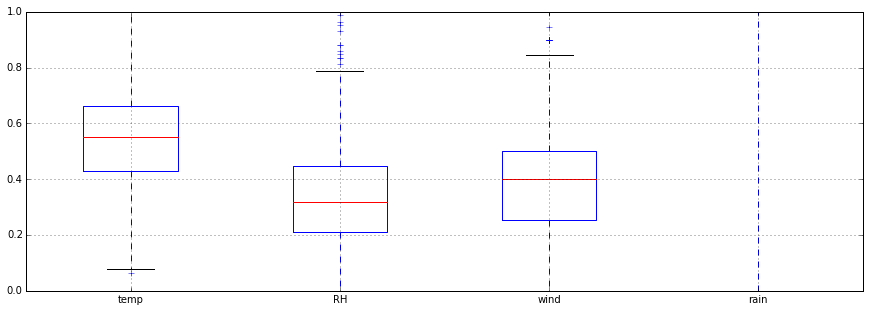

In [93]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
nndf.boxplot(ax=ax)
plt.show()

* 산악 지형은 비가 많이 오지 않음
* 

##**[Mission 4] 4대 요인 및 area를 포함하여 dataframe을 얻어오고 area를 두 가지 부류로 나누어 각 4가지 속성을 비교 분석하기**

In [145]:
sdf = df[['temp', 'RH', 'wind', 'rain', 'area']]
sdf

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.00
1,18.0,33,0.9,0.0,0.00
2,14.6,33,1.3,0.0,0.00
3,8.3,97,4.0,0.2,0.00
4,11.4,99,1.8,0.0,0.00
5,22.2,29,5.4,0.0,0.00
6,24.1,27,3.1,0.0,0.00
7,8.0,86,2.2,0.0,0.00
8,13.1,63,5.4,0.0,0.00
9,22.8,40,4.0,0.0,0.00


In [181]:
num_row = sdf.shape[0]
save_area = {}
array_area = sdf['area']
for i in range(num_row):
    save_area[i] = np.log(1+array_area[i])

In [184]:
sndf = pd.DataFrame({'temp':sdf['temp'] ,'RH':sdf['RH'] ,'wind':sdf['wind'] ,'rain':sdf['rain'],'area':save_area})
snndf = sndf[['temp', 'RH', 'wind', 'rain','area']]

In [186]:
snndf.describe()

,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663,1.111026
std,5.806625,16.317469,1.791653,0.295959,1.398436
min,2.200000,15.000000,0.400000,0.000000,0.000000
25%,15.500000,33.000000,2.700000,0.000000,0.000000
50%,19.300000,42.000000,4.000000,0.000000,0.418710
75%,22.800000,53.000000,4.900000,0.000000,2.024193
max,33.300000,100.000000,9.400000,6.400000,6.995620


In [249]:
sdf_1 = snndf[snndf['area']>=0.418710]
sdf_2 = snndf[snndf['area']<0.418710]

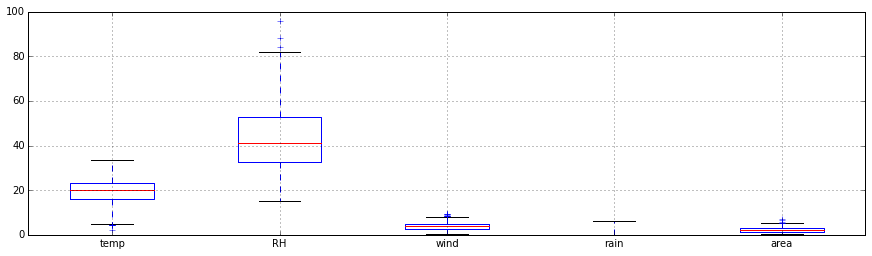

,temp,RH,wind,rain,area
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,19.256923,43.696154,4.133462,0.030000,2.198902
std,6.269451,15.275462,1.899338,0.405969,1.226033
min,2.200000,15.000000,0.400000,0.000000,0.418710
25%,15.900000,32.750000,2.700000,0.000000,1.228844
50%,20.100000,41.000000,4.000000,0.000000,2.022208
75%,23.400000,53.000000,4.900000,0.000000,2.838020
max,33.300000,96.000000,9.400000,6.400000,6.995620


In [251]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sdf_1.boxplot(ax=ax)
plt.show()
sdf_1.describe()

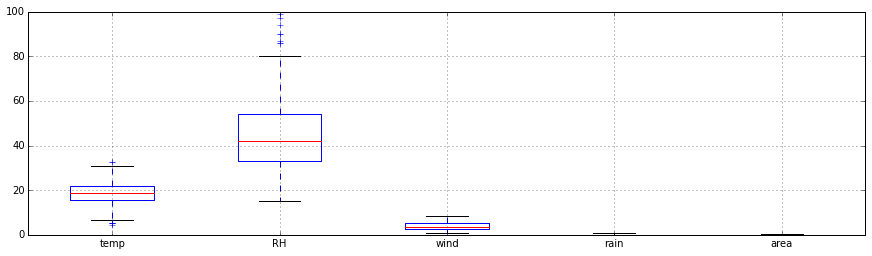

,temp,RH,wind,rain,area
count,257.000000,257.00000,257.000000,257.000000,257.000000
mean,18.517121,44.88716,3.900389,0.013230,0.010450
std,5.283718,17.31732,1.671229,0.098326,0.055369
min,4.200000,15.00000,0.900000,0.000000,0.000000
25%,15.400000,33.00000,2.700000,0.000000,0.000000
50%,18.700000,42.00000,3.600000,0.000000,0.000000
75%,21.700000,54.00000,5.400000,0.000000,0.000000
max,32.400000,100.00000,8.500000,1.000000,0.385262


In [252]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sdf_2.boxplot(ax=ax)
plt.show()
sdf_2.describe()

##**[Mission 5] 단일변수 선형 회귀분석을 통하여 가장 영향이 높은 속성 선발**

In [309]:
sdf = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
sdf

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [310]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['FFMC'].values, sdf['area'].values)
format = "%40s: %12.10f"
print "%50s"%("linear regression FFMC vs area")
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)
pv={}
pv[0]=p_value

                    linear regression FFMC vs area
                                   slope: 0.4626716896
                               intercept: -29.0914355742
       r_value (Correlation Coefficient): 0.0401220042
r-squared (Coefficient of Determination): 0.0016097752
           p_value (Hyperthesis Testing): 0.3625916100
                std_err (Standard Error): 0.5077347093


In [311]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['DMC'].values, sdf['area'].values)
format = "%40s: %12.10f"
pv[1]=p_value
print "%50s"%("linear regression DMC vs area")
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                     linear regression DMC vs area
                                   slope: 0.0725490536
                               intercept: 4.8036087052
       r_value (Correlation Coefficient): 0.0729942963
r-squared (Coefficient of Determination): 0.0053281673
           p_value (Hyperthesis Testing): 0.0973351344
                std_err (Standard Error): 0.0436796471


In [312]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['DC'].values, sdf['area'].values)
format = "%40s: %12.10f"
pv[2]=p_value
print "%50s"%("linear regression DC vs area")
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                      linear regression DC vs area
                                   slope: 0.0126721405
                               intercept: 5.9037189351
       r_value (Correlation Coefficient): 0.0493832253
r-squared (Coefficient of Determination): 0.0024387029
           p_value (Hyperthesis Testing): 0.2623628824
                std_err (Standard Error): 0.0112937120


In [313]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['ISI'].values, sdf['area'].values)
format = "%40s: %12.10f"
pv[3]=p_value
print "%50s"%("linear regression ISI vs area")
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                     linear regression ISI vs area
                                   slope: 0.1152873143
                               intercept: 11.8072087207
       r_value (Correlation Coefficient): 0.0082576878
r-squared (Coefficient of Determination): 0.0000681894
           p_value (Hyperthesis Testing): 0.8514183624
                std_err (Standard Error): 0.6151834430


In [314]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['temp'].values, sdf['area'].values)
format = "%40s: %12.10f"
pv[4]=p_value
print "%50s"%("linear regression temp vs area")
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                    linear regression temp vs area
                                   slope: 1.0726276211
                               intercept: -7.4137515648
       r_value (Correlation Coefficient): 0.0978441073
r-squared (Coefficient of Determination): 0.0095734693
           p_value (Hyperthesis Testing): 0.0261014606
                std_err (Standard Error): 0.4807527963


In [315]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['RH'].values, sdf['area'].values)
format = "%40s: %12.10f"
pv[5]=p_value
print "%50s"%("linear regression RH vs area")
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                      linear regression RH vs area
                                   slope: -0.2946042610
                               intercept: 25.8947848450
       r_value (Correlation Coefficient): -0.0755185635
r-squared (Coefficient of Determination): 0.0057030534
           p_value (Hyperthesis Testing): 0.0862705515
                std_err (Standard Error): 0.1714114159


In [316]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['wind'].values, sdf['area'].values)
format = "%40s: %12.10f"
pv[6]=p_value
print "%50s"%("linear regression wind vs area")
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                    linear regression wind vs area
                                   slope: 0.4376218589
                               intercept: 11.0891018123
       r_value (Correlation Coefficient): 0.0123172769
r-squared (Coefficient of Determination): 0.0001517153
           p_value (Hyperthesis Testing): 0.7799390704
                std_err (Standard Error): 1.5654807822


In [317]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['rain'].values, sdf['area'].values)
format = "%40s: %12.10f"
pv[7]=p_value
print "%50s"%("linear regression rain vs area")
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                    linear regression rain vs area
                                   slope: -1.5842442175
                               intercept: 12.8816122538
       r_value (Correlation Coefficient): -0.0073657293
r-squared (Coefficient of Determination): 0.0000542540
           p_value (Hyperthesis Testing): 0.8673101386
                std_err (Standard Error): 9.4774386537


In [318]:
format = "%40s: %12.10f"
print format % ("FFMC p-value", pv[0])
print format % ("DMC p-value", pv[1])
print format % ("DC p-value", pv[2])
print format % ("ISI p-value", pv[3])
print format % ("temp p-value", pv[4])
print format % ("RH p-value", pv[5])
print format % ("wind p-value", pv[6])
print format % ("rain p-value", pv[7])

                            FFMC p-value: 0.3625916100
                             DMC p-value: 0.0973351344
                              DC p-value: 0.2623628824
                             ISI p-value: 0.8514183624
                            temp p-value: 0.0261014606
                              RH p-value: 0.0862705515
                            wind p-value: 0.7799390704
                            rain p-value: 0.8673101386


* p-value가 가장 작은 2가지 요인을 선택함.
* p-value < 0.05 인 데이터는 'temp' 하나뿐이며, 그다음 작은 요인은 'RH'임
* 따라서 가장 영향이 높은 속성은 'temp'와 'RH'로 판단됨

##**[Mission 6] 가장 영향이 높은 요인 두 개로 다변수 선형 회귀분석 수행**

In [306]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [321]:
X = zip(sdf['temp'], sdf['RH'])
print X
y = sdf['area'].values

[(8.1999999999999993, 51), (18.0, 33), (14.6, 33), (8.3000000000000007, 97), (11.4, 99), (22.199999999999999, 29), (24.100000000000001, 27), (8.0, 86), (13.1, 63), (22.800000000000001, 40), (17.800000000000001, 51), (19.300000000000001, 38), (17.0, 72), (21.300000000000001, 42), (26.399999999999999, 21), (22.899999999999999, 44), (15.1, 27), (16.699999999999999, 47), (15.9, 35), (9.3000000000000007, 44), (18.300000000000001, 40), (19.100000000000001, 38), (21.0, 44), (19.5, 43), (23.699999999999999, 32), (16.300000000000001, 60), (19.0, 34), (19.399999999999999, 48), (30.199999999999999, 24), (22.800000000000001, 39), (25.399999999999999, 24), (11.199999999999999, 78), (20.600000000000001, 37), (17.699999999999999, 39), (21.199999999999999, 32), (18.199999999999999, 62), (21.699999999999999, 24), (11.300000000000001, 60), (17.800000000000001, 27), (14.1, 43), (23.300000000000001, 37), (18.399999999999999, 42), (16.600000000000001, 54), (19.600000000000001, 48), (12.9, 74), (25.89999999

In [322]:
regr = regr.fit(X, y)
print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [ 0.8810733  -0.12925007]
Intercept: 1.92880310331


In [345]:
test = {}
num_row = sdf.shape[0]

In [346]:
for i in range(num_row):
    test[i]=regr.predict(X[i])

In [357]:
lrdf = pd.DataFrame({'temp':sdf['temp'] ,'RH':sdf['RH'] ,'area':sdf['area'],'predict_area':test})
lrdf2 = lrdf[['temp', 'RH', 'area','predict_area']]
lrdf_temp = lrdf2.sort_index(by='temp')
lrdf_RH = lrdf2.sort_index(by='RH')

In [358]:
lrdf_temp

,temp,RH,area,predict_area
280,2.2,59,9.27,[-3.75858956052]
282,4.2,51,0.00,[-0.9624424175]
279,4.6,21,9.77,[3.26748890492]
278,4.6,21,22.03,[3.26748890492]
277,4.6,21,10.73,[3.26748890492]
276,4.6,21,17.85,[3.26748890492]
465,4.6,59,6.84,[-1.64401362906]
463,4.6,82,5.39,[-4.61676516278]
273,4.8,57,8.98,[-1.20929883474]
211,5.1,96,26.00,[-5.98572944396]


In [360]:
lrdf_RH

,temp,RH,area,predict_area
85,21.5,15,0.00,[18.9331281557]
197,21.5,15,11.06,[18.9331281557]
50,20.8,17,0.00,[18.057876709]
111,18.8,18,0.00,[16.1664800328]
218,19.4,19,31.72,[16.565873949]
421,30.8,19,0.00,[26.6101096234]
393,15.2,19,0.00,[12.8653660689]
79,21.6,19,0.00,[18.5042352195]
241,16.7,20,0.00,[14.0577259594]
279,4.6,21,9.77,[3.26748890492]


* 온도가 높을 수록 예측치가 커지는 경향을 보임
* RH의 경향과는 크게 상관없어 보이는 결과를 보이고 있음
* area중 불이 나지 않은 데이터 구간도 불이 나는 결과를 보이고 있음
* 예측치 중 (-) 데이터의 해석은 하기 힘듬.
* 결과적으로 선형회귀를 통한 분석은 신뢰하기 힘들다는 의견을 제시함

##**[Mission 7] 가장 영향이 높은 요인 두 개로 다변수 로지스틱 회귀분석 수행**

In [373]:
logdf = pd.DataFrame({'temp':sdf['temp'] ,'RH':sdf['RH'],'area':save_area})
logdf2 = logdf[['temp', 'RH', 'area']]
logdf2

,temp,RH,area
0,8.2,51,0.000000
1,18.0,33,0.000000
2,14.6,33,0.000000
3,8.3,97,0.000000
4,11.4,99,0.000000
5,22.2,29,0.000000
6,24.1,27,0.000000
7,8.0,86,0.000000
8,13.1,63,0.000000
9,22.8,40,0.000000


In [369]:
selected_attrs = sdf[['temp', 'RH']]
selected_data = selected_attrs.values
selected_data
target_series = sdf.iloc[:, 8]
burned_area = target_series.values
burned_area

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [370]:
regr4 = linear_model.LogisticRegression()
regr4.fit(selected_data, burned_area)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)